# Unit 5 - Financial Planning


In [1]:
# Initial imports
import json
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = '1.2'
my_eth = '5.3'

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

response_data_btc = requests.get(btc_url)
response_data_eth = requests.get(eth_url)


In [5]:
# Print `response_data variable`
response_data_btc
response_data_eth

<Response [200]>

In [6]:
# -------- #

# Fetch current BTC price

# Store response using `content` attribute
btc_data = response_data_btc.content

# Format BTC data as JSON
btc_json = response_data_btc.json()

# Use json.dumps to format data
print(json.dumps(btc_json, indent=8))

{
        "data": {
                "1": {
                        "id": 1,
                        "name": "Bitcoin",
                        "symbol": "BTC",
                        "website_slug": "bitcoin",
                        "rank": 1,
                        "circulating_supply": 18750456,
                        "total_supply": 18750456,
                        "max_supply": 21000000,
                        "quotes": {
                                "USD": {
                                        "price": 34129.0,
                                        "volume_24h": 23389371198,
                                        "market_cap": 639942336088,
                                        "percentage_change_1h": -1.21562442575273,
                                        "percentage_change_24h": 0.59149319541866,
                                        "percentage_change_7d": -5.11430980791007,
                                        "percent_change_1h": -1.21562442575273,
 

In [7]:
# Display btc_json key path to get current price
btc_json['data']['1']['quotes']['USD'].keys()

dict_keys(['price', 'volume_24h', 'market_cap', 'percentage_change_1h', 'percentage_change_24h', 'percentage_change_7d', 'percent_change_1h', 'percent_change_24h', 'percent_change_7d'])

In [8]:
# Select only the BTC price
btc_json['data']['1']['quotes']['USD']['price']


34129.0

In [9]:
# -------- #

# Fetch current ETH price

# Store response using `content` attribute
eth_data = response_data_eth.content

# Format BTC data as JSON
eth_json = response_data_eth.json()

# Use json.dumps to format data
print(json.dumps(eth_json, indent=8))



{
        "data": {
                "1027": {
                        "id": 1027,
                        "name": "Ethereum",
                        "symbol": "ETH",
                        "website_slug": "ethereum",
                        "rank": 2,
                        "circulating_supply": 116600552,
                        "total_supply": 116600552,
                        "max_supply": 0,
                        "quotes": {
                                "USD": {
                                        "price": 2336.09,
                                        "volume_24h": 23605685227,
                                        "market_cap": 273137585637,
                                        "percentage_change_1h": -1.06548537958298,
                                        "percentage_change_24h": 1.45616773422876,
                                        "percentage_change_7d": 7.68346452558629,
                                        "percent_change_1h": -1.06548537958298,

In [10]:
# Display eth_json key path to get current price
eth_json['data']['1027']['quotes']['USD'].keys()

dict_keys(['price', 'volume_24h', 'market_cap', 'percentage_change_1h', 'percentage_change_24h', 'percentage_change_7d', 'percent_change_1h', 'percent_change_24h', 'percent_change_7d'])

In [11]:
# Select only the ETH price 
eth_json['data']['1027']['quotes']['USD']['price']

2336.09

In [12]:
# -------- #

# Compute current value of my cryptos and store each in its own variable
my_btc_value = btc_json['data']['1']['quotes']['USD']['price']
my_eth_value = eth_json['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $34129.00
The current value of your 5.3 ETH is $2336.09


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Current amount of shares
my_agg = '200'
my_spy = '50'

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


In [15]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [16]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-07-04", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

shares_data = {
    "shares": [200, 50]
}

# Create the shares DataFrame - wasn't part of the HW but I wanted the practice!
agg_spy_df = pd.DataFrame(shares_data, index=tickers)

# Preview DataFrame
agg_spy_df

,shares
AGG,200
SPY,50


In [17]:
# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2021-07-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-02", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["AGG", "SPY"]

# Get current closing prices for SPY and AGG
agg_spy_df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Display sample data
agg_spy_df_ticker


AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-07-02 00:00:00-04:00  115.23  115.37  115.17  115.37  4219494  431.67   

                                                              
                            high       low   close    volume  
time                                                          
2021-07-02 00:00:00-04:00  434.1  430.5218  433.75  46557070

In [18]:
# Pick AGG and SPY close prices
agg_close_price = agg_spy_df_ticker.iloc[0][3] # not in love with this method because it is not repeatable - have to modify code for each successive date
spy_close_price = agg_spy_df_ticker.iloc[0][8] # same

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.37
Current SPY closing price: $433.75


In [19]:
# Compute the current value of shares
my_spy_value = float(spy_close_price)*float(my_spy)
my_agg_value = float(agg_close_price)*float(my_agg)

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21687.50
The current value of your 200 AGG shares is $23074.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthly_income = int(12000)


# Create savings DataFrame

crypto_amt = my_btc_value + my_eth_value
shares_amt = my_spy_value + my_agg_value

investments = ["Crypto", "Shares"]

portfolio_data = {
    "amount": [crypto_amt, shares_amt]
}

df_savings = pd.DataFrame(portfolio_data, index=investments)


# Display savings DataFrame
display(df_savings)

,amount
Crypto,36465.09
Shares,44761.50


<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='amount'>

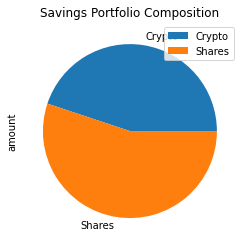

In [21]:
# Plot savings pie chart
# Create a pie chart to show the proportion of stocks in the portfolio
df_savings.plot.pie(y="amount", title="Savings Portfolio Composition")

In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

emergency_fund

# Calculate total amount of savings
total_savings = crypto_amt + shares_amt

total_savings

# Validate saving health

     # Use `if` conditional statements to validate if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.

     #    * If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.

     #    * If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.

     #    * If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.

if total_savings > emergency_fund:
    print(f"Congratulations, your current total savings of ${total_savings:0.2f} exceeds the minimum recommended amount of emergency funds.")
elif total_savings == emergency_fund:
    print(f"Congratulations, your current total savings of ${total_savings:0.2f} meets the minimum recommended amount of emergency funds.")
else:
    print(f"Currently, your total savings are ${(emergency_fund - total_savings):0.2f} short of the recommended minimum amount of emergency funds.")
            

Congratulations, your current total savings of $81226.59 exceeds the minimum recommended amount of emergency funds.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-07-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-07-05', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG

# Set timeframe to '1D'
timeframe = "1D"

# Set the ticker information
tickers = ["AGG", "SPY"]

# Get 5 year's worth of historical price data
retirement_df = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


# Display sample data
retirement_df.head(-1)

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-07-13 00:00:00-04:00  109.29  109.3118  109.1300  109.240  1432660.0   
2017-07-14 00:00:00-04:00  109.54  109.5600  109.2900  109.360  1744770.0   
2017-07-17 00:00:00-04:00  109.40  109.4800  109.3200  109.410  1910544.0   
2017-07-18 00:00:00-04:00  109.64  109.7100  109.5800  109.680  2471170.0   
2017-07-19 00:00:00-04:00  109.72  109.7500  109.6300  109.700  1405289.0   
...                           ...       ...       ...      ...        ...   
2021-06-25 00:00:00-04:00  115.11  115.1300  114.7516  114.890  3987588.0   
2021-06-28 00:00:00-04:00  115.04  115.2300  115.0400  115.160  5523690.0   
2021-06-29 00:00:00-04:00  115.06  115.2500  115.0450  115.250  3469405.0   
2021-06-30 00:00:00-04:00  115.36  115.4500  115.3000  115.350  5984381.0   
2021-07-01 00:00:00-04:00  115.15  115.1900  115.0100  115.115  4439326.0   

                              SPY                                        
                             open      high     low   close      volume  
time                                                                     
2017-07-13 00:00:00-04:00     NaN       NaN     NaN     NaN         NaN  
2017-07-14 00:00:00-04:00  244.42  245.9700  244.31  245.54  40758038.0  
2017-07-17 00:00:00-04:00  245.47  245.9100  245.33  245.51  22378971.0  
2017-07-18 00:00:00-04:00  245.06  245.7200  244.67  245.69  31695494.0  
2017-07-19 00:00:00-04:00  246.02  247.0000  246.01  246.99  31007738.0  
...                           ...       ...     ...     ...         ...  
2021-06-25 00:00:00-04:00  425.90  427.0943  425.55  426.57  50460394.0  
2021-06-28 00:00:00-04:00  427.17  427.6500  425.89  427.48  43937373.0  
2021-06-29 00:00:00-04:00  427.89  428.5600  427.13  427.68  32097572.0  
2021-06-30 00:00:00-04:00  427.20  428.7800  427.18  428.08  46776402.0  
2021-07-01 00:00:00-04:00  428.83  430.6000  428.80  430.47  44147835.0  

[1000 rows x 10 columns]

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_4060_dist = MCSimulation(
    portfolio_data = retirement_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [26]:
# Printing the simulation input data
MC_4060_dist.portfolio_data.head()

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2017-07-13 00:00:00-04:00  109.29  109.3118  109.13  109.24  1432660.0   
2017-07-14 00:00:00-04:00  109.54  109.5600  109.29  109.36  1744770.0   
2017-07-17 00:00:00-04:00  109.40  109.4800  109.32  109.41  1910544.0   
2017-07-18 00:00:00-04:00  109.64  109.7100  109.58  109.68  2471170.0   
2017-07-19 00:00:00-04:00  109.72  109.7500  109.63  109.70  1405289.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-07-13 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-07-14 00:00:00-04:00     0.001098  244.42  245.97  244.31  245.54   
2017-07-17 00:00:00-04:00     0.000457  245.47  245.91  245.33  245.51   
2017-07-18 00:00:00-04:00     0.002468  245.06  245.72  244.67  245.69   
2017-07-19 00:00:00-04:00     0.000182  246.02  247.00  246.01  246.99   

                                                    
                               volume daily_return  
time                                                
2017-07-13 00:00:00-04:00         NaN          NaN  
2017-07-14 00:00:00-04:00  40758038.0          NaN  
2017-07-17 00:00:00-04:00  22378971.0    -0.000122  
2017-07-18 00:00:00-04:00  31695494.0     0.000733  
2017-07-19 00:00:00-04:00  31007738.0     0.005291

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_4060_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005209,1.011489,0.992500,1.004216,1.004570,0.993813,1.011775,0.988184,1.007658,1.014654,...,0.995802,1.011791,1.007606,0.995346,1.012802,0.982352,0.999268,1.003105,0.998310,0.988732
2,1.006233,1.010536,0.992381,0.996891,1.018113,0.999176,0.990717,0.996971,1.004222,1.023561,...,1.005890,1.004140,0.999416,0.997582,1.006347,0.977013,0.998567,1.010150,0.997286,0.987402
3,0.997534,1.026194,0.982065,0.981387,1.018931,0.996759,0.996562,0.987456,1.002636,1.018052,...,1.007542,0.998180,0.994196,0.992608,1.003080,0.967083,1.010324,1.010309,1.013559,0.981603
4,0.996633,1.032786,0.988949,0.992971,1.019182,1.002409,0.998488,0.992033,0.997072,0.999675,...,1.007679,0.997769,0.998236,0.989559,0.986335,0.955353,1.006469,1.009781,1.008894,0.982496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.547780,10.241292,13.129828,19.434715,33.693839,14.045782,36.349959,13.179331,9.863437,22.568596,...,16.878313,20.964962,15.402960,16.763966,47.968636,10.458696,33.896386,23.208177,22.681672,35.513691
7557,12.502339,10.177012,12.896182,19.658864,33.451000,13.777199,36.445887,12.997073,9.932382,22.554963,...,16.942870,21.248566,15.562700,16.916893,48.253022,10.383856,34.031423,23.209935,22.739123,35.334561
7558,12.385321,10.296480,12.900531,19.499520,33.518513,13.800981,36.602629,12.848487,9.859340,22.643518,...,16.652922,21.623347,15.561344,16.834877,48.303004,10.306663,33.773075,23.480394,22.786925,35.872578
7559,12.324236,10.283680,12.737353,19.722435,33.759308,13.849874,36.406349,12.926175,9.875769,22.534066,...,16.532788,21.654631,15.665534,16.585257,47.867671,10.339705,33.633693,23.450553,22.720834,35.790086


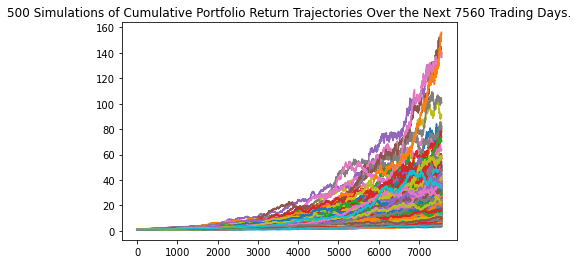

In [28]:
# Plot simulation outcomes
line_plot = MC_4060_dist.plot_simulation()

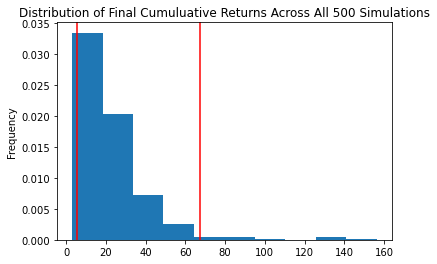

In [29]:
# Plot probability distribution and confidence intervals
dist_plot = MC_4060_dist.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
MC4060_tbl = MC_4060_dist.summarize_cumulative_return()

# Print summary statistics
MC4060_tbl

count           500.000000
mean             22.927873
std              18.288740
min               3.028425
25%              11.844478
50%              18.170113
75%              28.968375
max             156.260481
95% CI Lower      5.401628
95% CI Upper     67.379228
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 investments stocks
MC4060_ci_lower = round(MC4060_tbl[8]*initial_investment,2)
MC4060_ci_upper = round(MC4060_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${MC4060_ci_lower} and ${MC4060_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $108032.55 and $1347584.57


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
modified_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000 investments stocks
MC4060_ci_lower = round(MC4060_tbl[8]*modified_initial_investment,2)
MC4060_ci_upper = round(MC4060_tbl[9]*modified_initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${modified_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${MC4060_ci_lower} and ${MC4060_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $162048.83 and $2021376.85


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_5yr_dist = MCSimulation(
    portfolio_data = retirement_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_5yr_dist.portfolio_data.head(-1)

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-07-13 00:00:00-04:00  109.29  109.3118  109.1300  109.240  1432660.0   
2017-07-14 00:00:00-04:00  109.54  109.5600  109.2900  109.360  1744770.0   
2017-07-17 00:00:00-04:00  109.40  109.4800  109.3200  109.410  1910544.0   
2017-07-18 00:00:00-04:00  109.64  109.7100  109.5800  109.680  2471170.0   
2017-07-19 00:00:00-04:00  109.72  109.7500  109.6300  109.700  1405289.0   
...                           ...       ...       ...      ...        ...   
2021-06-25 00:00:00-04:00  115.11  115.1300  114.7516  114.890  3987588.0   
2021-06-28 00:00:00-04:00  115.04  115.2300  115.0400  115.160  5523690.0   
2021-06-29 00:00:00-04:00  115.06  115.2500  115.0450  115.250  3469405.0   
2021-06-30 00:00:00-04:00  115.36  115.4500  115.3000  115.350  5984381.0   
2021-07-01 00:00:00-04:00  115.15  115.1900  115.0100  115.115  4439326.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-07-13 00:00:00-04:00          NaN     NaN       NaN     NaN     NaN   
2017-07-14 00:00:00-04:00     0.001098  244.42  245.9700  244.31  245.54   
2017-07-17 00:00:00-04:00     0.000457  245.47  245.9100  245.33  245.51   
2017-07-18 00:00:00-04:00     0.002468  245.06  245.7200  244.67  245.69   
2017-07-19 00:00:00-04:00     0.000182  246.02  247.0000  246.01  246.99   
...                                ...     ...       ...     ...     ...   
2021-06-25 00:00:00-04:00    -0.001564  425.90  427.0943  425.55  426.57   
2021-06-28 00:00:00-04:00     0.002350  427.17  427.6500  425.89  427.48   
2021-06-29 00:00:00-04:00     0.000782  427.89  428.5600  427.13  427.68   
2021-06-30 00:00:00-04:00     0.000868  427.20  428.7800  427.18  428.08   
2021-07-01 00:00:00-04:00    -0.002037  428.83  430.6000  428.80  430.47   

                                                    
                               volume daily_return  
time                                                
2017-07-13 00:00:00-04:00         NaN          NaN  
2017-07-14 00:00:00-04:00  40758038.0          NaN  
2017-07-17 00:00:00-04:00  22378971.0    -0.000122  
2017-07-18 00:00:00-04:00  31695494.0     0.000733  
2017-07-19 00:00:00-04:00  31007738.0     0.005291  
...                               ...          ...  
2021-06-25 00:00:00-04:00  50460394.0     0.003482  
2021-06-28 00:00:00-04:00  43937373.0     0.002133  
2021-06-29 00:00:00-04:00  32097572.0     0.000468  
2021-06-30 00:00:00-04:00  46776402.0     0.000935  
2021-07-01 00:00:00-04:00  44147835.0     0.005583  

[1000 rows x 12 columns]

In [34]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001788,1.006218,0.994411,1.010499,1.006311,1.013335,0.987224,1.009132,1.007533,0.996399,...,1.005801,1.009150,0.996358,1.002657,1.002114,1.008108,0.997805,0.995970,1.008150,1.000682
2,0.997603,1.003798,0.987356,0.987422,0.988010,1.004050,0.981474,1.008656,1.002958,1.003547,...,0.988915,1.008758,1.009820,0.997675,0.995097,1.002122,0.985075,0.993206,1.005560,0.992721
3,1.001406,0.989144,0.986269,0.989035,0.976962,0.991467,0.988288,1.008802,1.011194,1.009178,...,0.981843,1.034546,1.018501,1.012629,1.005639,1.012425,0.972549,0.983806,1.025790,0.982326
4,1.007053,0.987285,0.999696,0.992077,0.980174,1.003924,1.008061,1.023622,1.007639,1.010600,...,0.957904,1.035433,1.002776,1.009886,1.011677,1.005670,0.999810,0.979208,1.031326,1.002178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.246519,2.729176,1.529471,2.510724,4.062175,1.441161,1.087553,1.614795,1.297783,1.195197,...,1.823061,1.152594,3.379501,1.766493,1.790944,1.806386,0.990820,3.643846,2.682750,2.875947
1257,1.258071,2.764577,1.517685,2.590325,4.064829,1.444523,1.079440,1.637170,1.304323,1.203782,...,1.792372,1.137286,3.376811,1.742315,1.796918,1.828984,1.003609,3.662782,2.679212,2.840353
1258,1.286282,2.751206,1.513985,2.590813,4.069085,1.453337,1.083550,1.648821,1.298122,1.207051,...,1.793553,1.123688,3.375334,1.771148,1.801974,1.834446,1.011877,3.615923,2.711100,2.856787
1259,1.272956,2.751586,1.507964,2.581116,4.115570,1.430975,1.124200,1.674160,1.308330,1.229919,...,1.836390,1.141771,3.306329,1.760828,1.747559,1.861666,1.015843,3.611462,2.762365,2.926470


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

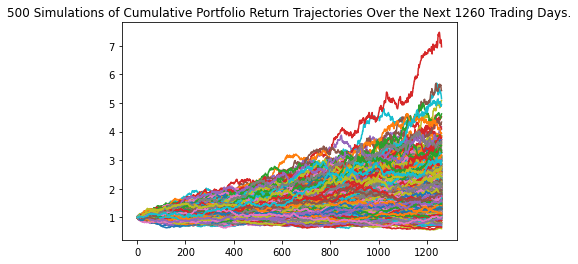

In [36]:
# Plot simulation outcomes
MC_5yr_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

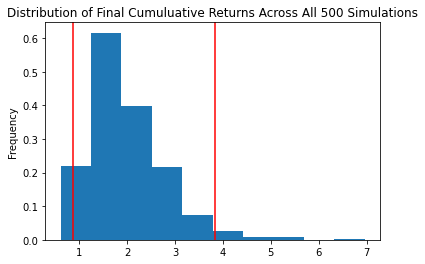

In [37]:
# Plot probability distribution and confidence intervals
MC_5yr_dist.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_5yr_dist_tbl = MC_5yr_dist.summarize_cumulative_return()

# Print summary statistics
MC_5yr_dist_tbl

count           500.000000
mean              1.981780
std               0.805216
min               0.605337
25%               1.422490
50%               1.831603
75%               2.368801
max               6.965304
95% CI Lower      0.857655
95% CI Upper      3.824744
Name: 1260, dtype: float64

In [39]:
# Set initial investment
_5yr_initial_investment = 80000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000 investments stocks
MC_5yr_ci_lower = round(MC_5yr_dist_tbl[8]*_5yr_initial_investment,2)
MC_5yr_ci_upper = round(MC_5yr_dist_tbl[9]*_5yr_initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${_5yr_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${MC_5yr_ci_lower} and ${MC_5yr_ci_upper}."
      f" It appears that even quadrupling the initial"
      f" investment and overleveraging stocks (80%) to bonds (20%),"
      f" retirement in 5 years is unlikely.")

There is a 95% chance that an initial investment of $80000 in the portfolio over the next 5 years will end within in the range of $68612.36 and $305979.49. It appears that even quadrupling the initial investment and overleveraging stocks (80%) to bonds (20%), retirement in 5 years is unlikely.


### Ten Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_10yr_dist = MCSimulation(
    portfolio_data = retirement_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_10yr_dist.portfolio_data.head(-1)

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-07-13 00:00:00-04:00  109.29  109.3118  109.1300  109.240  1432660.0   
2017-07-14 00:00:00-04:00  109.54  109.5600  109.2900  109.360  1744770.0   
2017-07-17 00:00:00-04:00  109.40  109.4800  109.3200  109.410  1910544.0   
2017-07-18 00:00:00-04:00  109.64  109.7100  109.5800  109.680  2471170.0   
2017-07-19 00:00:00-04:00  109.72  109.7500  109.6300  109.700  1405289.0   
...                           ...       ...       ...      ...        ...   
2021-06-25 00:00:00-04:00  115.11  115.1300  114.7516  114.890  3987588.0   
2021-06-28 00:00:00-04:00  115.04  115.2300  115.0400  115.160  5523690.0   
2021-06-29 00:00:00-04:00  115.06  115.2500  115.0450  115.250  3469405.0   
2021-06-30 00:00:00-04:00  115.36  115.4500  115.3000  115.350  5984381.0   
2021-07-01 00:00:00-04:00  115.15  115.1900  115.0100  115.115  4439326.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-07-13 00:00:00-04:00          NaN     NaN       NaN     NaN     NaN   
2017-07-14 00:00:00-04:00     0.001098  244.42  245.9700  244.31  245.54   
2017-07-17 00:00:00-04:00     0.000457  245.47  245.9100  245.33  245.51   
2017-07-18 00:00:00-04:00     0.002468  245.06  245.7200  244.67  245.69   
2017-07-19 00:00:00-04:00     0.000182  246.02  247.0000  246.01  246.99   
...                                ...     ...       ...     ...     ...   
2021-06-25 00:00:00-04:00    -0.001564  425.90  427.0943  425.55  426.57   
2021-06-28 00:00:00-04:00     0.002350  427.17  427.6500  425.89  427.48   
2021-06-29 00:00:00-04:00     0.000782  427.89  428.5600  427.13  427.68   
2021-06-30 00:00:00-04:00     0.000868  427.20  428.7800  427.18  428.08   
2021-07-01 00:00:00-04:00    -0.002037  428.83  430.6000  428.80  430.47   

                                                    
                               volume daily_return  
time                                                
2017-07-13 00:00:00-04:00         NaN          NaN  
2017-07-14 00:00:00-04:00  40758038.0          NaN  
2017-07-17 00:00:00-04:00  22378971.0    -0.000122  
2017-07-18 00:00:00-04:00  31695494.0     0.000733  
2017-07-19 00:00:00-04:00  31007738.0     0.005291  
...                               ...          ...  
2021-06-25 00:00:00-04:00  50460394.0     0.003482  
2021-06-28 00:00:00-04:00  43937373.0     0.002133  
2021-06-29 00:00:00-04:00  32097572.0     0.000468  
2021-06-30 00:00:00-04:00  46776402.0     0.000935  
2021-07-01 00:00:00-04:00  44147835.0     0.005583  

[1000 rows x 12 columns]

In [41]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992550,1.005347,1.008466,0.980299,1.005011,1.024743,0.998033,1.008974,0.994756,1.010855,...,0.989325,0.996882,1.002936,0.992719,0.989177,0.999702,1.002816,1.013882,1.001306,0.989886
2,1.001851,1.008041,1.013167,0.981495,0.994205,1.016355,1.001542,0.996482,0.989674,1.023807,...,0.999402,0.994790,1.007414,1.009360,1.003165,0.972610,1.007757,1.001682,1.003571,1.009465
3,1.003569,1.014259,1.023515,0.987655,0.990214,1.010444,1.006591,1.003433,0.997413,1.041600,...,1.002763,1.003781,0.991539,1.020341,0.999493,0.957509,1.014191,1.005580,1.003036,1.002720
4,1.009898,1.027302,1.017199,0.970908,0.986362,0.981148,1.002365,0.986451,0.987950,1.038546,...,1.004729,1.006997,0.985446,1.016896,0.985346,0.965048,1.007835,1.005251,1.004297,1.027694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.970741,3.288648,2.748875,2.090059,2.478164,3.213341,6.877628,3.331529,5.731657,2.133003,...,3.478218,2.436580,5.688811,2.071092,4.868598,3.974474,0.814954,1.493417,2.968482,4.237827
2517,4.981951,3.259352,2.756935,2.086633,2.460148,3.225061,6.821477,3.365563,5.680049,2.146413,...,3.484704,2.470140,5.793884,2.084490,4.793563,3.975522,0.800910,1.487826,2.908146,4.246607
2518,4.967471,3.235243,2.755951,2.091935,2.443960,3.262365,6.929869,3.407504,5.690722,2.159634,...,3.455312,2.493315,5.863899,2.124263,4.833377,3.901079,0.800747,1.493514,2.837924,4.287174
2519,4.988496,3.252654,2.792999,2.090515,2.447772,3.221391,6.876348,3.391774,5.603155,2.176120,...,3.455312,2.545509,5.673515,2.123150,4.787931,3.915885,0.802133,1.502676,2.844560,4.233803


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

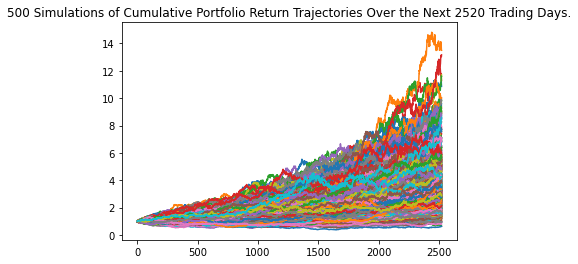

In [42]:
# Plot simulation outcomes
MC_10yr_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

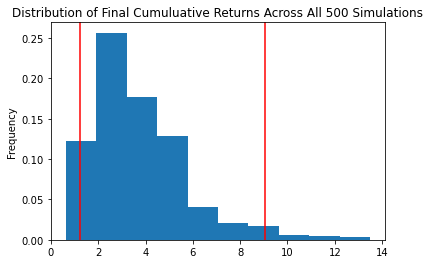

In [43]:
# Plot probability distribution and confidence intervals
MC_10yr_dist.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_10yr_dist_tbl = MC_10yr_dist.summarize_cumulative_return()

# Print summary statistics
MC_10yr_dist_tbl

count           500.000000
mean              3.718863
std               2.034230
min               0.628857
25%               2.241385
50%               3.264122
75%               4.838586
max              13.496788
95% CI Lower      1.208638
95% CI Upper      9.036567
Name: 2520, dtype: float64

In [45]:
# Set initial investment
_10yr_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000 investments stocks
MC_10yr_ci_lower = round(MC_10yr_dist_tbl[8]*_10yr_initial_investment,2)
MC_10yr_ci_upper = round(MC_10yr_dist_tbl[9]*_10yr_initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${_10yr_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${MC_10yr_ci_lower} and ${MC_10yr_ci_upper}."
      f" The increased initial investment of $60000"
      f" along with overleveraging stocks (80%) to bonds (20%)"
      f" does seem to make retirement in 10 years possible.")



There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $72518.27 and $542194.04. The increased initial investment of $60000 along with overleveraging stocks (80%) to bonds (20%) does seem to make retirement in 10 years possible.
